# Import external environment data

In [1]:
# Import external code libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats
%matplotlib notebook

In [2]:
# Import data from CSV file and assign to dataframe named 'df'
df = pd.read_csv("temp_monitor_log.csv")

In [3]:
# Make the timestamp column the dataframe index
df.set_index(pd.to_datetime(df['Timestamp']), inplace=True)
df = df.drop('Timestamp', axis='columns')

In [4]:
df

,Degrees C,Degrees F,Humidity
Timestamp,,,
2022-05-20 17:05:02,22.66,72.79,38.35
2022-05-20 18:05:02,22.41,72.34,38.61
2022-05-20 19:05:02,21.04,69.87,39.42
2022-05-20 20:05:02,20.06,68.11,41.70
2022-05-20 21:05:02,20.81,69.46,43.50
...,...,...,...
2022-09-25 10:05:02,23.89,75.00,55.71
2022-09-25 11:05:02,24.14,75.45,48.63
2022-09-25 12:05:02,24.16,75.49,46.07


# Plot time-series of temperture and humidity

## Plot temp only using the 'XKCD' format style. This plot displays the last 170 entries.

<IPython.core.display.Javascript object>


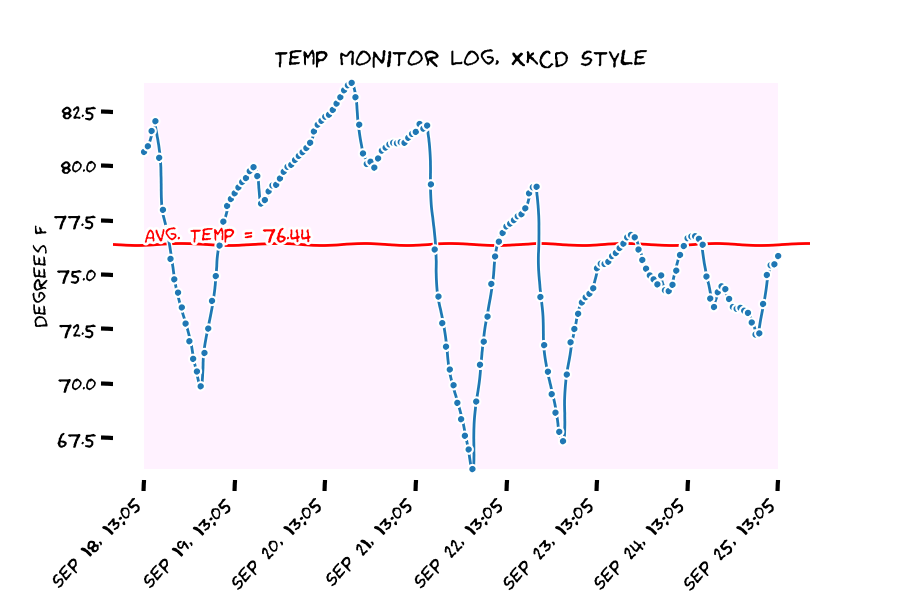

In [5]:
with plt.xkcd(scale=1):
    #plt.style.use("seaborn-colorblind")
    #sns.set()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    mn = df.iloc[-170:-1]['Degrees F'].min()
    mx = df.iloc[-170:-1]['Degrees F'].max()
    avg = df.iloc[-170:-1]['Degrees F'].mean()
    xleft = mdates.date2num(df.index[-170])
    xright = mdates.date2num(df.index[-1])
    ax.set_xticks(np.arange(xleft, xright, 1))

    myFmt = mdates.DateFormatter('%b %d, %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate(rotation=45)
    #plt.xticks(rotation=90)

    ax.fill_between(df.index[-170:-1], mn, mx, facecolor='magenta', alpha=0.05)
    lhor = plt.axhline(avg,zorder=1, color='red')
    #plt.hlines(avg, xleft, xright, color='red')
    ax.annotate('Avg. Temp = {}'.format(round(avg, 2)), xy=(xleft,avg+0.2), color='red')
    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    ax.set(ylim=[mn-0.5, mx+0.5], title='Temp Monitor Log, XKCD Style', ylabel='Degrees F')    
    #plt.subplots_adjust(bottom=0.25)
    plt.plot(df.iloc[-170:-1]['Degrees F'], '.-');

## Temp and humidity in same figure. This plot also displays the last 170 entries.

<IPython.core.display.Javascript object>


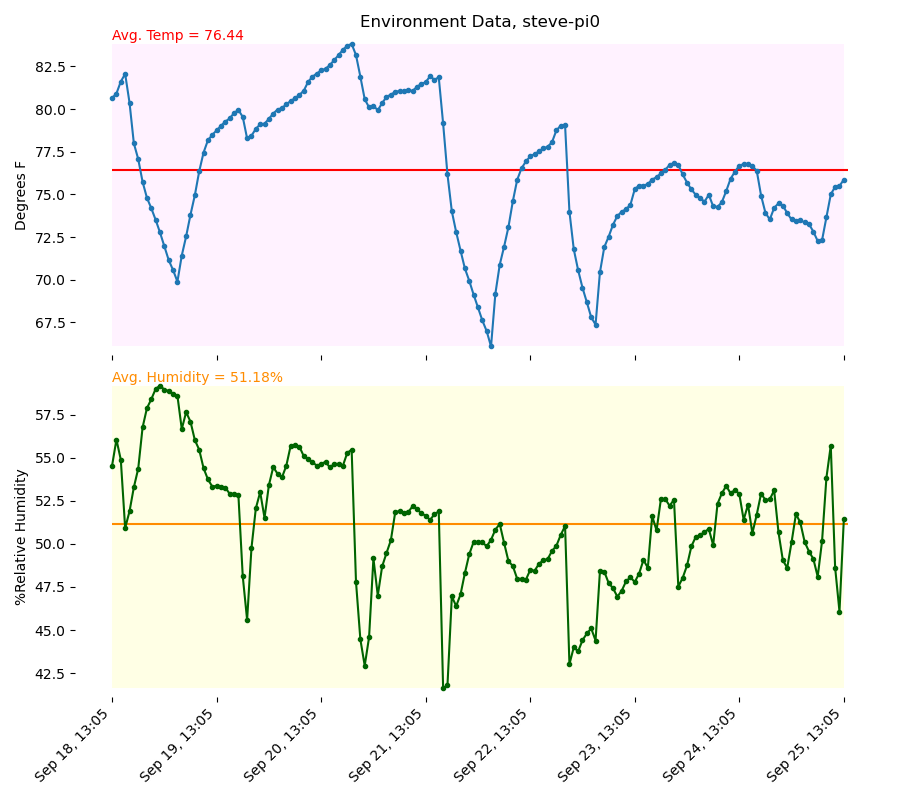

In [6]:
xleft = mdates.date2num(df.index[-170])
xright = mdates.date2num(df.index[-1])

fig2 = plt.figure(figsize=(9, 8))

ax1 = plt.subplot(2, 1, 1)
mn = df.iloc[-170:-1]['Degrees F'].min()
mx = df.iloc[-170:-1]['Degrees F'].max()
avg = df.iloc[-170:-1]['Degrees F'].mean()
ax1.fill_between(df.index[-170:-1], mn, mx, facecolor='magenta', alpha=0.05)
plt.hlines(avg, xleft, xright, color='red')
ax1.annotate('Avg. Temp = {}'.format(round(avg, 2)), xy=(xleft,mx+0.2), color='red')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax1.set(ylim=[mn-0.5, mx+0.5],title='Environment Data, steve-pi0', ylabel='Degrees F')
plt.xticks(labels=None)
plt.plot(df.iloc[-170:-1]['Degrees F'], '.-', picker=True)
# The 2 lines below are for point picking
ax.xaxis.set_pickradius(5.)
ax.yaxis.set_pickradius(5.)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
mn2 = df.iloc[-170:-1]['Humidity'].min()
mx2 = df.iloc[-170:-1]['Humidity'].max()
avg2 = df.iloc[-170:-1]['Humidity'].mean()
ax2.fill_between(df.index[-170:-1], mn2, mx2, facecolor='yellow', alpha=0.1)
plt.hlines(avg2, xleft, xright, color='darkorange')
ax2.annotate('Avg. Humidity = {}%'.format(round(avg2, 2)), xy=(xleft, mx2+0.2), color='darkorange')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax2.set(ylim=[mn2-0.5, mx2+0.5], ylabel='%Relative Humidity')
ax2.set_xticks(np.arange(xleft, xright, 1))
myFmt = mdates.DateFormatter('%b %d, %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
fig2.autofmt_xdate(rotation=45)
plt.plot(df.iloc[-170:-1]['Humidity'], '.-', color='darkgreen', picker=True)
plt.tight_layout()

## The code below makes the plots directly above interactive. Click within the plot area to have the date/time of the point clicked replace the plot title.

In [7]:
# This function describes what to pass when a value is picked. 
# In this case the selected location's index value, using iloc[x].name
def onpick(event):
    origin = df.iloc[event.ind[0]].name # correct one
    offset = df.index[-171] - df.index[0]
    # Offset to account for the fact that the chart doesn't start at index[0], but the pick event.ind[] does
    origin2 = origin + offset
    # change the date format, set custom title
    ax1.set_title(origin2.strftime('%b %d, %H:%M')) # correct(changed to origin2)
    #ax1.annotate(df['Degrees F'], df['Humidity'], xy=(event.x, event.y)) ***workInProgress
# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
_=plt.gcf().canvas.mpl_connect('pick_event', onpick)

## Plot all dataframe values in a single time-series plot. 

<IPython.core.display.Javascript object>


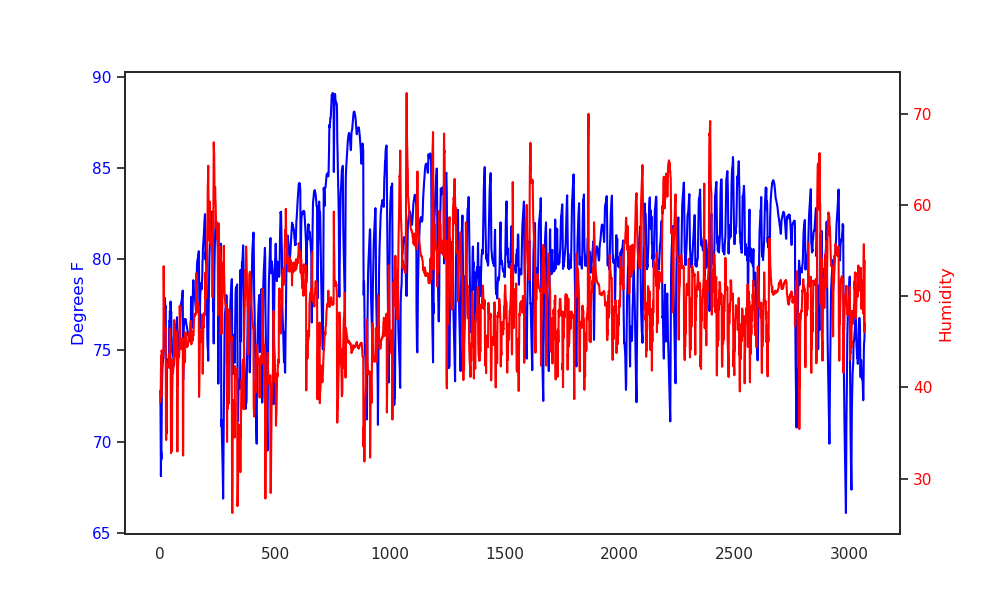

In [8]:
# Drop the datetime index
df2=df.reset_index()
# Plot all values in dataframe
sns.set_theme(style='white')
figure3 = plt.figure(figsize=(10,6))
ax3 = figure3.add_subplot(111)
ax3.set_ylabel('Degrees F', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.plot(df2['Degrees F'], color='blue')#, marker='.')
ax4 = ax3.twinx()
ax4.set_ylabel('Humidity', color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax4.plot(df2['Humidity'], color='red',);#, marker='+')

# Stats on environment data

In [9]:
df.describe()
# Summary of basic statistics

,Degrees C,Degrees F,Humidity
count,3069.000000,3069.000000,3069.000000
mean,26.567315,79.821180,49.429153
std,1.931268,3.476319,5.863016
min,18.940000,66.090000,26.230000
25%,25.480000,77.860000,45.440000
50%,26.740000,80.130000,49.430000
75%,27.790000,82.020000,52.760000
max,31.730000,89.110000,72.290000


## Investigate potential relationship between temp and Humidity.

In [10]:
# One way to display a correlation between 2 columns
df['Degrees F'].corr(df['Humidity'])
# Relationship between columns. 1 = perfect correlation, 0 = none

-0.011129970526973926

In [11]:
# Another way
df[['Humidity','Degrees F']].corr()

,Humidity,Degrees F
Humidity,1.00000,-0.01113
Degrees F,-0.01113,1.00000


In [12]:
# Or just run a Pearson correlation test and get a P-value as well
corr, p = scipy.stats.pearsonr(df['Degrees F'], df['Humidity'])
print('Pearsons correlation: %.6f' % corr)
print('P-value: %.6f' % p)

Pearsons correlation: -0.011130
P-value: 0.537662


If the P-value above is less than 0.05 we will conclude that there is a relationship between temp and Humidity, otherwise not.

## Display the row with the highest temp, then the row with the highest humidity.

In [13]:
print("Highest Temp:")
print(df[df['Degrees F'] == df['Degrees F'].max()])
print("\n----------------------------------------------------\n")
print("Highest Humidity:")
print(df[df['Humidity'] == df['Humidity'].max()])

Highest Temp:
                     Degrees C  Degrees F  Humidity
Timestamp                                          
2022-06-21 01:05:02      31.73      89.11     49.04

----------------------------------------------------

Highest Humidity:
                     Degrees C  Degrees F  Humidity
Timestamp                                          
2022-07-04 11:05:02      25.55      77.99     72.29


## Plot data and regression model fits across a FacetGrid.


<IPython.core.display.Javascript object>


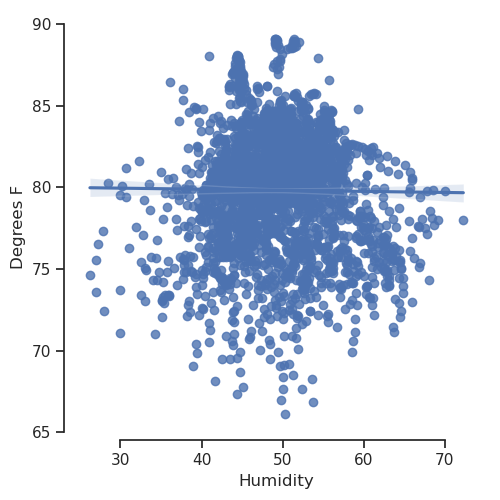

In [14]:
#sns.set(style="whitegrid")
sns.set_theme(style='ticks')
sns.lmplot(x='Humidity', y='Degrees F', data=df)
#plt.xticks(np.linspace(25, 70, 10))
#plt.yticks(np.arange(66, 92, 2))
sns.despine(offset=5,trim=True)

# A few examples of jointplots to describe temp and humidity together without regard for time. All dataframe values are included.

<IPython.core.display.Javascript object>


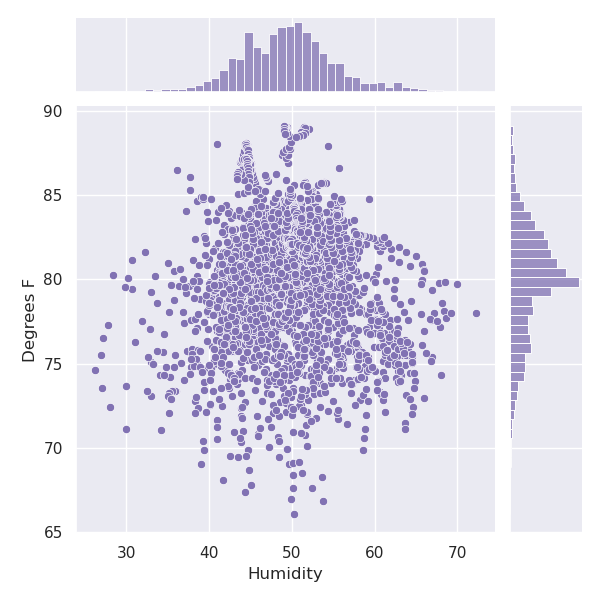

In [15]:
# I like the jointplot, it shows a lot of info at a glance
sns.set_theme(style='darkgrid')
_=sns.jointplot(data=df, x='Humidity', y="Degrees F", kind="scatter", color='m')

<IPython.core.display.Javascript object>


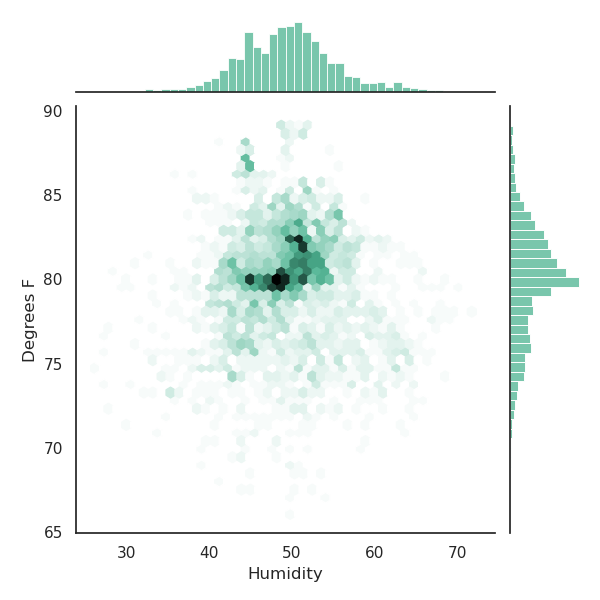

In [16]:
# Hexbin plots are better with a LOT of datapoints
sns.set_theme(style="white")
_=sns.jointplot(data=df, x='Humidity', y='Degrees F', kind='hex', color='#4CB391')

<IPython.core.display.Javascript object>


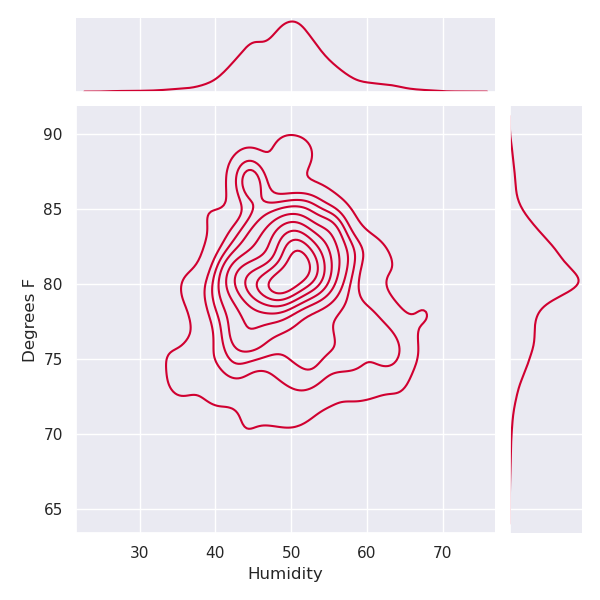

In [17]:
# kde jointplots are just trippy
sns.set_theme(style='darkgrid')
_=sns.jointplot(data=df, x='Humidity', y='Degrees F', kind='kde', color='#d00030')

# Examples of some other useful plot types

<IPython.core.display.Javascript object>


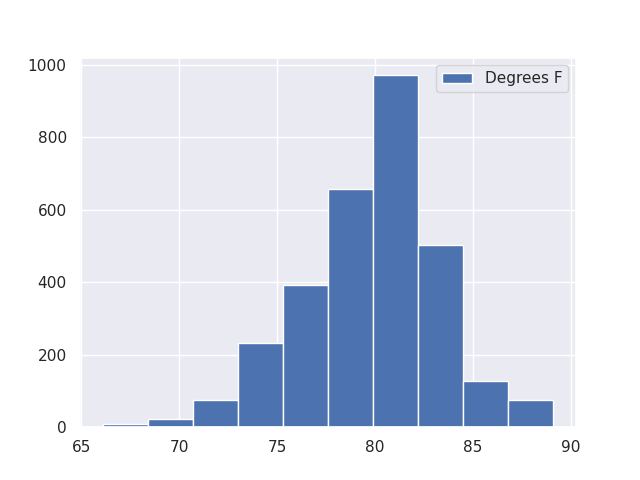

In [18]:
# Histogram of all temp readings (F)

plt.figure()
plt.hist(df['Degrees F'], label='Degrees F')
plt.legend();

<IPython.core.display.Javascript object>


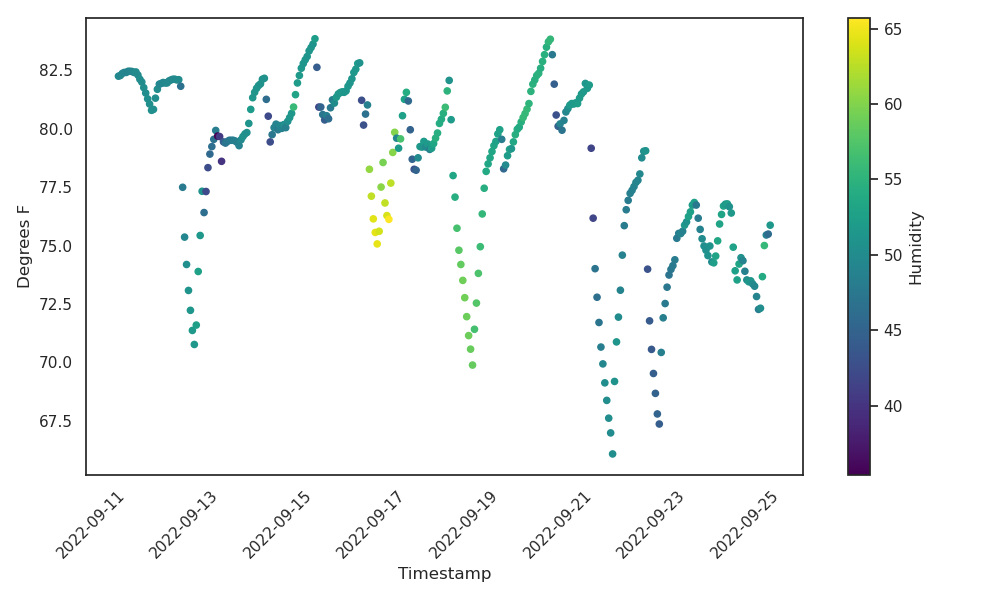

In [34]:
# A scatterplot of temperature over time, with humidity expressed as a colorscale applied
# to the data points.
sns.set_theme(style='white')

end = -1 # -1 is the last (most recent) record in the dataframe
start = end - (168*2) # 168 = 1 week's measurements

fig, ax6 = plt.subplots(figsize=(10,6))

df2.iloc[start:end].plot.scatter('Timestamp', 'Degrees F', c='Humidity', colormap='viridis', ax=ax6)
ax6.tick_params(axis='x', labelrotation = 45)

plt.tight_layout()

# Plotting and Describing a Slice of Data

In [20]:
start = 1850 # Starting index value
end = start + 168 # 1 Week's worth (24 hr * 7 days)

<IPython.core.display.Javascript object>


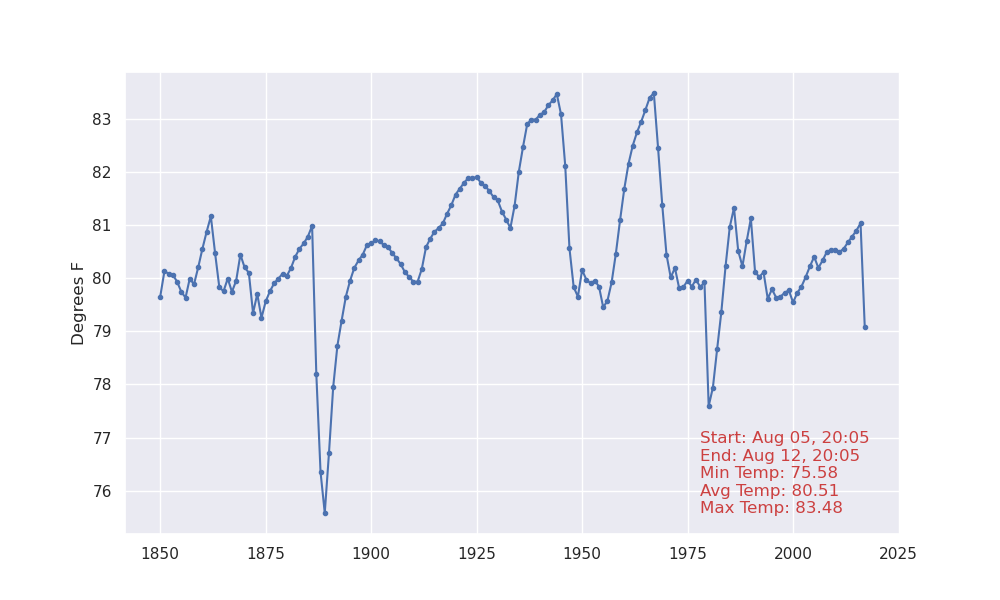

In [26]:
sns.set_theme(style='darkgrid')
figure4 = plt.figure(figsize=(10,6))
ax4 = figure4.add_subplot(111)
ax4.set_ylabel('Degrees F')
ax4.plot(df2.iloc[start:end]['Degrees F'], marker='.')

# Need to anchor annotation X/Y's using variable locations based on chart data
# so the chart start point can be changed without text falling off the edges
labelx = end - 40
labely = np.min(df2.iloc[start:end]['Degrees F'])

ax4.annotate('Start: {}\nEnd: {}\nMin Temp: {}\nAvg Temp: {}\nMax Temp: {}'
             .format(df2.iloc[start]['Timestamp'].strftime('%b %d, %H:%M'),
                     df2.iloc[end]['Timestamp'].strftime('%b %d, %H:%M'),
                     round(np.min(df.iloc[start:end]['Degrees F']),2),
                     round(np.average(df.iloc[start:end]['Degrees F']),2),
                     round(np.max(df.iloc[start:end]['Degrees F']),2)),
             xy=(labelx,labely), color='#CC4040');

In [27]:
# This is the slice of the dataframe plotted above
df2.iloc[start:end]

,Timestamp,Degrees C,Degrees F,Humidity
1850,2022-08-05 20:05:02,26.47,79.65,41.21
1851,2022-08-05 21:05:02,26.74,80.13,45.90
1852,2022-08-05 22:05:02,26.71,80.08,45.48
1853,2022-08-05 23:05:02,26.70,80.06,45.89
1854,2022-08-06 00:05:02,26.63,79.93,45.39
...,...,...,...,...
2013,2022-08-12 15:05:02,27.04,80.67,51.56
2014,2022-08-12 16:05:02,27.10,80.78,51.31
2015,2022-08-12 17:05:02,27.16,80.89,51.35
2016,2022-08-12 18:05:02,27.24,81.03,51.49


# Grouping by date and plotting min, max, and mean values

<IPython.core.display.Javascript object>


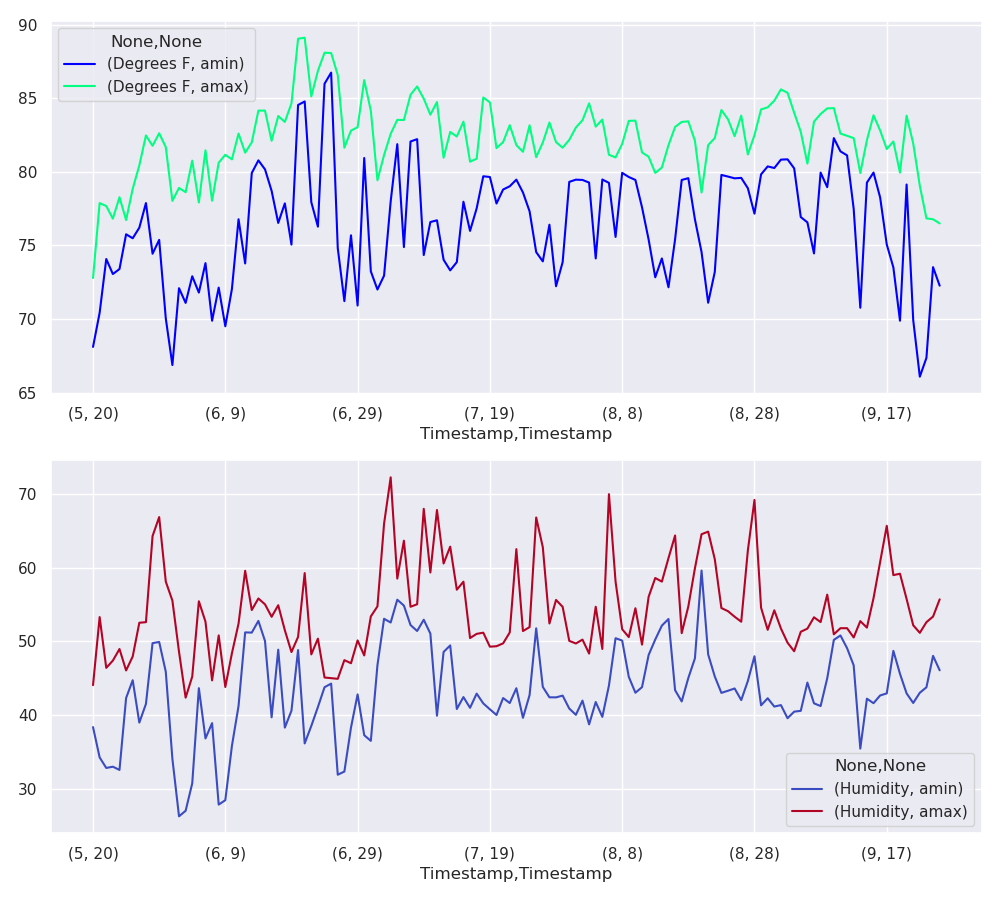

In [29]:
# Set up a figure with 2 axes, plot degrees F min / max on the top plot and humidity min / max on the bottom one.
# Each data point represents a day.

fig1 = plt.figure(figsize=(10,9))
ax1_1 = fig1.add_subplot(211)
ax1_2 = fig1.add_subplot(212)

df.groupby(by=[df.index.month, df.index.day]).agg({'Degrees F':[np.min, np.max]}).plot(ax=ax1_1, colormap='winter');
df.groupby(by=[df.index.month, df.index.day]).agg({'Humidity':[np.min, np.max]}).plot(ax=ax1_2, colormap='coolwarm');
plt.tight_layout()

<IPython.core.display.Javascript object>


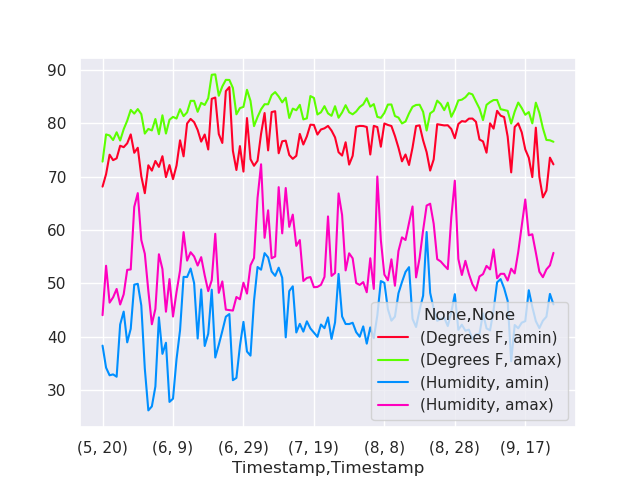

In [30]:
# Or skip all the extra work and just spit it all out on one plot with one line of code.

df.groupby(by=[df.index.month, df.index.day]).agg({'Degrees F':[np.min, np.max], 'Humidity':[np.min, np.max]}).plot(colormap='gist_rainbow');

In [31]:
# A tabular output of the data as plotted above.

df.groupby(by=[df.index.month, df.index.day]).agg({'Degrees F':[np.min, np.max],'Humidity':[np.min, np.max]})

Degrees F        Humidity       
                         amin   amax     amin   amax
Timestamp Timestamp                                 
5         20            68.11  72.79    38.35  44.05
          21            70.43  77.88    34.23  53.30
          22            74.08  77.68    32.80  46.40
          23            73.06  76.82    32.97  47.39
          24            73.40  78.28    32.53  48.96
...                       ...    ...      ...    ...
9         21            69.94  81.93    41.63  52.19
          22            66.09  79.05    43.02  51.16
          23            67.37  76.84    43.76  52.61
          24            73.53  76.78    48.03  53.37
          25            72.27  76.50    46.07  55.71

[129 rows x 4 columns]

<IPython.core.display.Javascript object>


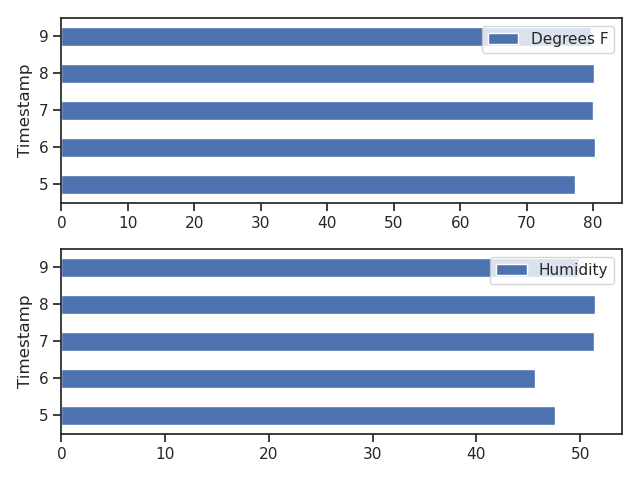

In [38]:
# Make horizontal bar plots of average degrees F and humidity for each month

sns.set_theme(style="ticks")

fig3 = plt.figure()
ax1_3 = fig3.add_subplot(211)
ax1_4 = fig3.add_subplot(212)

df.groupby(by=[df.index.month]).agg({'Degrees F':np.mean}).plot(ax=ax1_3, kind='barh');
df.groupby(by=[df.index.month]).agg({'Humidity':np.mean}).plot(ax=ax1_4, kind='barh');
plt.tight_layout()

In [33]:
# A tabular output of the data as plotted above.

df.groupby(by=[df.index.month]).agg({'Degrees F':np.mean, 'Humidity': np.mean})

,Degrees F,Humidity
Timestamp,,
5,77.223593,47.609259
6,80.345500,45.636028
7,80.004234,51.346599
8,80.152984,51.453226
9,79.720981,49.919729
